# 인공신경망 회귀
인공신경망을 활용하여 회귀함수 추정 문제를 다루려고 한다. 
인공신경망을 활용하여 회귀 문제를 다루는 경우 인공신경망 방법론의 추정 및 예측 성능에 영향을 미치는 요소들 (활성화 함수, 훈련 알고리즘, 초기값 등)이 상당히 많은데, 여기서는 최대한 간단한 경우를 다루겠다.
먼저, 하나의 은닉층으로 구성된 인공신경망을 활용할 것인데, 수식으로 다음과 같이 표현할 수 있다.

$$
\mathsf{s}_{\theta}(x) = \beta_0 + \sum_{m=1}^M \beta_m \sigma(b_m + w_m^{\top} x), \quad x \in \mathbb{R}^p.
$$

여기서 $b_m \in \mathbb{R}$, $w_m \in \mathbb{R}^p$, $\beta_0 \in \mathbb{R}$, $\beta_m \in \mathbb{R}$ 이며, $\theta$ 는 인공신경망을 구성하는 계수들을 모아놓은 벡터로 이해할 수 있다. 
$\sigma$ 는 활성화 함수를 나타내며, 대표적으로 ReLU, Sigmoid function 등이 있다. 경우에 따라 문제에 맞는 활성화 함수를 정의할 수도 있을 것이다. 
참고로 입력 노드의 수는 $p$, 은닉 노드의 수는 $M$, 출력 노드의 수는 $1$ 이다. 
은닉 노드의 수 $M$ 에 따라 인공신경망의 복잡도가 결정되는 경우가 많긴 하지만, 이 복잡도가 추정량에 직결되어 전달되진 않는다..
그 예로 아주 큰 $M$ 을 설정하여도 초기값, 훈련 알고리즘 등에 따라 이 복잡도가 추정량에 담기지 않을 수 있기 때문이다.

데이터 $\{(x_i, y_i\}_{i=1}^n$ 가 주어진 경우, 이 데이터를 잘 설명하는 인공신경망 계수를 찾아 인공신경망 회귀 추정량을 계산할 수 있다.
먼저 손실함수를 다음과 같이 정의하도록 하자.

$$
R(\theta) = \sum_{i=1}^n \left(y_i - \mathsf{s}_{\theta}(x_i) \right)^2
$$

다음 손실함수를 최소화하는 계수를 

$$
\hat{\theta} = \text{argmin} R(\theta)
$$

로 정의하기로 하자 (사실 정확한 수식적 표현은 아니다..). 
인공신경망 회귀 추정량은

$$
\hat{f} = \mathsf{s}_{\hat{\theta}} = \hat{\beta}_0 + \sum_{m=1}^M \hat{\beta}_m \sigma(\hat{b}_m + \hat{w}_m^{\top} x)
$$
으로 정의할 수 있다. 

Python 패키지 중 하나인 Pytorch 를 통해 이를 구현해보자! 

## 데이터 생성
간단한 예제로 1차원 회귀함수 추정 문제를 다루고 이를 시각화해보려고 한다. 목표는 데이터 관계를 나타내는 회귀함수 (붉은 실선) 를 데이터 (회색 점) 을 활용하여 추정하는 것이다.

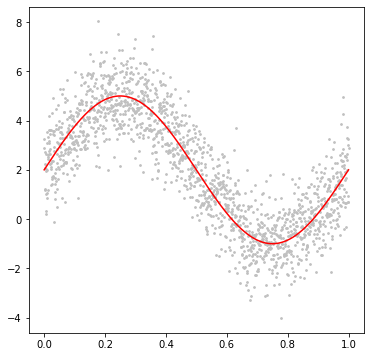

In [25]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
# random seed 설정
torch.manual_seed(1)
# data genreation
n = 1600
p = 1
x = torch.zeros((n, p))
for j in range(p):
    x[:, j] = torch.linspace(0.0, 1.0, n)
f = 2 + 3 * torch.sin(2 * torch.pi * x[:, 0])
y = f + np.random.normal(0, 1, size = n)
plt.figure(figsize = (6, 6))
plt.scatter(x, y, s = 3, color = 'silver')
plt.plot(x, f, color = 'red')
plt.show()

## Pytorch 활용한 인공신경망 회귀적합
Pytorch 를 활용하여 인공신경망을 훈련하려고 하는데, 여기서 활성화 함수로 ReLU, 훈련 알고리즘으로 Adam 알고리즘을 이용하였다.
Adam 알고리즘의 학습률을 보통 작게 설정하는 것이 안정적으로 알려져 있는데, 여기서는 인공신경망이 깊지 않기 때문에 $0.01$ 로 설정하였고 안정적으로 훈련하는 것 또한 확인할 수 있었다.
노드의 수 $M$ 은 $50$ 으로 설정하였다. 

In [33]:
from functions.Activations import *
# random seed 설정
torch.manual_seed(1)
## model: beta_0 + \sum_m beta_m act( b_m + w_m * x) 
## 계수 선언
M = 50
const = torch.randn(1, requires_grad = True)
beta = torch.randn(M, requires_grad = True)
W = torch.randn((p, M), requires_grad = True)
b = torch.randn((1, M), requires_grad = True)
optimizer = optim.Adam([beta, W, b], lr = 0.01)
act = relu
# 훈련 시작
n_iter = 1000
for i in range(n_iter):
    plane = b + x.matmul(W)
    act_plane = act(plane)
    model = const + act_plane.matmul(beta)
    obj = torch.mean((y - model) ** 2)
    
    optimizer.zero_grad()
    obj.backward()
    optimizer.step()
    if (i + 1) % 100 == 0:
        print(i + 1, "/", n_iter, 'th iteration runs')
        print("cost =", obj.item())

100 / 1000 th interation runs
cost = 1.6204397095632317
200 / 1000 th interation runs
cost = 1.2639575317935656
300 / 1000 th interation runs
cost = 1.113000787172713
400 / 1000 th interation runs
cost = 1.060228741994662
500 / 1000 th interation runs
cost = 1.0423744235628076
600 / 1000 th interation runs
cost = 1.0362771161487248
700 / 1000 th interation runs
cost = 1.0336600846161403
800 / 1000 th interation runs
cost = 1.0329567037736862
900 / 1000 th interation runs
cost = 1.0327241287763642
1000 / 1000 th interation runs
cost = 1.0323054335277164


## 적합 시각화

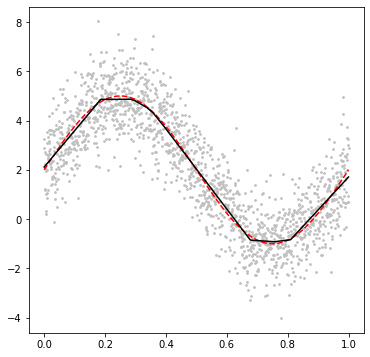

In [34]:
# fitted values
plane = b + x.matmul(W)
act_plane = act(plane)
fitted_values = const + act_plane.matmul(beta)
fitted_values = fitted_values.detach()
# visualization
plt.figure(figsize = (6, 6))
plt.scatter(x, y, s = 3, color = 'silver')
plt.plot(x, f, 'r', linestyle = '--')
plt.plot(x, fitted_values, 'black')
plt.show()